# Phishing Website Detection using Machine Learning Algorithms -Classification-

- **Haneen Alhomoud** <br>
- **HaneenAlhomoud@gmail.com**

## Description
Phishing attack is a simplest way to obtain sensitive information from innocent users. Aim of the phishers is to acquire critical information like username, password and bank account details.<br> This project will use machine learning algorithms to detect phishing URLs by extracting and analyzing various features of legitimate and phishing URLs. Using different classification algorithms such as **Logistic Regression, Tree, KNNeighbors, Random Forest,  Support vector machine (SVM) and NaiveBayes**. Aim of the project is to detect phishing URLs as well as narrow up to best machine learning algorithm by comparing accuracy rate, precision and recall rate of each algorithm.<br>

## Background of Problem Statement :
This code is used for a binary classification model (phishing website or not) using Python Scikit-Learn that trains on the data and calculates the accuracy, precision, recall and f2. More than one classification algorithms is used to train a model on the phishing and legitmite website data set.
    
The code template containing these code blocks:<br><br>
<font size="4">**PartI: Dataset Overview**</font><br>
<font size="3">• Import data<br>• EDA</font>

<font size="4">**PartII: Modeling**</font><br>
<font size="3">• Helper Definition<br></font>
<font size="3">• Split data (Train, Valid, Test)<br></font>
<font size="3">• Baseline models (LogisticRegression)<br></font>
<font size="3">• Models (KNeighbors, RandomForest, ExtraTrees, NaiveBayes and SVM)<br></font>
<font size="3">• Precision, Recal and Accuracy/Score<br></font>
<font size="3">• Choosen Classification Models<br></font>

<font size="4">**PartIII: Feature Engineering**</font><br>
<font size="3">• Helper Definition<br></font>
<font size="3">• Upsampling:<br></font>
<font size="2">○ Random<br></font><font size="2">○ SMOTE<br></font>
<font size="3">• Downsampling:<br></font>
<font size="2">○ TomekLinks<br></font><font size="2">○ KN<br></font>
<font size="3">• Random Forest Hyperparameter Tuning Using Random Search<br></font>

<font size="4">**PartIV: Graphs and Plots**</font><br>
<font size="3">• Precision and Recall plots<br></font>
<font size="3">• Confusion Matrices <br></font>
<font size="3">• Roc Curve<br></font>

<font size="4">**PartV: Pickling**</font><br>
<font size="3">• Train Models and Save to Pickled Files<br></font>
<font size="3">• Read Models from Pickled Files <br></font>

## Dataset Description:
The data set is provided both in the following URL https://www.kaggle.com/dnyaneshsatpute/phishing-webiste-detection/data in csv file:<br>
 
• A collection of website URLs for 11000+ websites (data point)<br>
• 30 columns to identify a phishing website or not (0 or 1):<br><br>

'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
'LinksPointingToPage', 'StatsReport', 'result'
**Detailed description of the columns is shown in the end of the notebook**<br>

Brief Description of the features in data set<br>
● UsingIP : { -1,1 } <br>
● LongURL : { 1,0,-1 }<br>
● ShortURL : { 1,-1 }<br>
● Symbol@ : { 1,-1 }<br>
● Redirecting// : { -1,1 }<br>
● PrefixSuffix- { -1,1 }<br>
● SubDomains : { -1,0,1 }<br>
● HTTPS : { -1,1,0 }<br>
● DomainRegLen : { -1,1 }<br>
● Favicon : { 1,-1 }<br>
● NonStdPort : { 1,-1 }<br>
● HTTPSDomainURL : { -1,1 } <br>
● RequestURL : { 1,-1 }<br>
● AnchorURL : { -1,0,1 }<br>
● Result : { 0,1 } <br>


In [18]:
import pandas as pd
import numpy as np
#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
#to save models weights
import pickle
#Classification models Imports
from sklearn import linear_model, neighbors, ensemble, naive_bayes, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score
                             , precision_recall_curve, roc_auc_score, roc_curve, fbeta_score
                             , make_scorer)
from beautifultable import BeautifulTable
from sklearn.model_selection import RandomizedSearchCV
#To handle imbalansed data 
import imblearn.under_sampling
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours 


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

## PartI: Dataset Overview

### Import data

In [60]:
df = pd.read_csv('data/phishing_websites.csv',index_col=0)
df.columns = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
                'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
                'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
                'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
                'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
                'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
                'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
                'LinksPointingToPage', 'StatsReport', 'result']
df.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,result
index,,,,,,,,,,,,,,,,,,,,,
1,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
2,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
3,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
4,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
5,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [22]:
df.shape

(11055, 31)

### EDA

In [23]:
df.result.value_counts()

 1    6157
-1    4898
Name: result, dtype: int64

In [24]:
#1 means phishing, 0 means legitimate 

df.result = df.result.replace(1,0)
df.result = df.result.replace(-1,1)
df.result.value_counts()

0    6157
1    4898
Name: result, dtype: int64

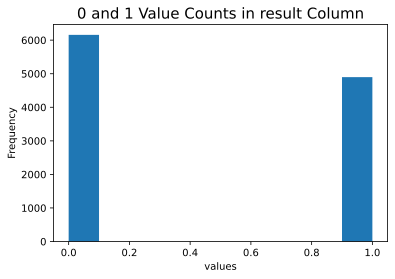

In [25]:
df.result.hist()
plt.grid(False)
plt.title('0 and 1 Value Counts in result Column', fontsize=15)
plt.xlabel('values')
plt.ylabel('Frequency')
plt.show()

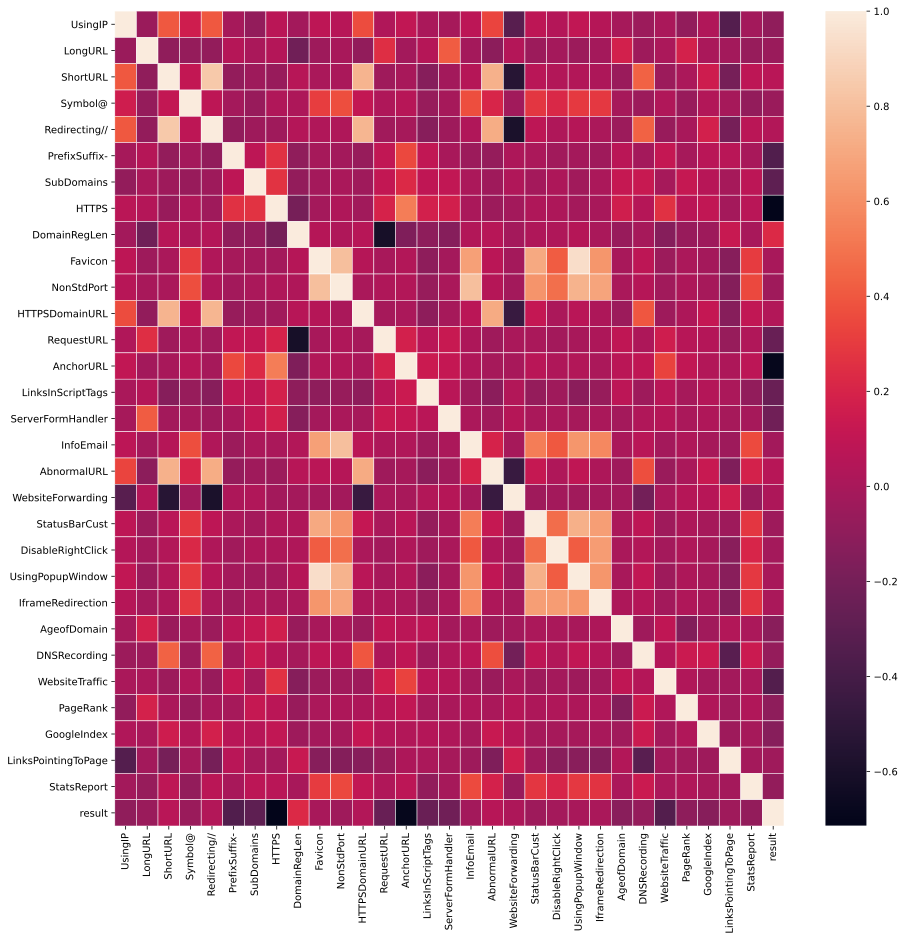

In [26]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)
plt.show()

In [27]:
print(df.corr()["result"]*100)

UsingIP                 -9.416009
LongURL                 -5.742963
ShortURL                 6.796589
Symbol@                 -5.294779
Redirecting//            3.860761
PrefixSuffix-          -34.860557
SubDomains             -29.832332
HTTPS                  -71.474120
DomainRegLen            22.578946
Favicon                  0.027952
NonStdPort              -3.641885
HTTPSDomainURL           3.985390
RequestURL             -25.337227
AnchorURL              -69.293452
LinksInScriptTags      -24.822852
ServerFormHandler      -22.141901
InfoEmail               -1.824901
AbnormalURL              6.048764
WebsiteForwarding        2.011346
StatusBarCust           -4.183844
DisableRightClick       -1.265323
UsingPopupWindow        -0.008589
IframeRedirection        0.339352
AgeofDomain            -12.149642
DNSRecording            -7.571775
WebsiteTraffic         -34.610311
PageRank               -10.464491
GoogleIndex            -12.895045
LinksPointingToPage     -3.257390
StatsReport   

In [28]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/45 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## PartII: Modeling

### Helper Definition

In [29]:
def split_data(df): 
    ''' method Splits the data to 60% Training 
        set and 20% Valid set 20% Teset set
        return 
            Splitted dataframes
    '''
    #Split to 80% Training and 20% Teset
    train, test = train_test_split(df, test_size= 0.2, random_state=42)
    #Split to 75% Training and 25% Teset
    train, valid = train_test_split(train, test_size= 0.25, random_state=42)
    return train, test, valid


def fit(df, target: str, models, model_names = []):
    ''' method takes a Train/Valid dataframe
        traint/fit the models
    '''
    df_x = df.drop(target, axis =1)
    df_y = df[target]
    if(model_names):
        for name in list(models):
            for name2 in model_names:
                if(name == name2):
                    curr_model = models[name]
                    curr_model.fit(df_x, df_y)
    else:
        for name in list(models):
            curr_model = models[name]
            curr_model.fit(df_x, df_y)
    
    
def metr(df, target: str, models, model_names = []):
    ''' method takes a Train/Valid dataframe and dictionary 
        that contains algorithms/models thenprints the Accuracy Precision Recall 
        and F2 scores for all models
    '''
    mod = []
    acc = []
    pre = []
    rec = []  
    fscore = []
    df_x = df.drop(target, axis =1)
    df_y = df[target]
    #Find Accuracy, Precision, Recal and F2 scores 
    
    if(model_names):
        for name in list(models):
            for name2 in model_names:
                if(name == name2):
                    mod.append(name)
                    curr_model = models[name]
                    pred = curr_model.predict(df_x) 
                    acc.append(100*round(accuracy_score(df_y, pred),4))
                    pre.append(100*round(precision_score(df_y, pred),4))
                    rec.append(100*round(recall_score(df_y, pred),4))
                    fscore.append(100*round(fbeta_score(df_y, pred, beta = 2),4))         
    else:     
        for name in list(models):
            mod.append(name)
            curr_model = models[name]
            pred = curr_model.predict(df_x) 
            acc.append(100*round(accuracy_score(df_y, pred),4))
            pre.append(100*round(precision_score(df_y, pred),4))
            rec.append(100*round(recall_score(df_y, pred),4))
            fscore.append(100*round(fbeta_score(df_y, pred, beta = 2),4))
    #Print table
    table = BeautifulTable()
    table.column_headers = ["", "Accuracy","Precision","Recall", "F2"]
    for (m, a, p, r, f) in zip(mod, acc,  pre,  rec, fscore):
        table.append_row([m,  a,  p,  r, f])
    print(table)

### Split data (Train, Test)

In [30]:
train, valid, test = split_data(df)

###  Models (LogisticRegression, KNeighbors, RandomForest, ExtraTrees, NaiveBayes and SVM)

In [31]:
models = {
    # using the default threshold of 0.5, which is what vanilla predict does
    'LogisticRegression' : linear_model.LogisticRegression(solver="lbfgs", random_state=1),
#       For multiclass problems use 'lbfgs'
#       handle L2 or no penalty
    'KNeighbors'  : neighbors.KNeighborsClassifier(n_neighbors = 5),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=1),
    'ExtraTrees'  : ExtraTreesClassifier(n_estimators=100, random_state=1),
    'NaiveBayes'  : naive_bayes.BernoulliNB(),
    'SVM'         : svm.SVC(C=100, gamma=0.0001, kernel='rbf', probability=True) #rbf finds the best fit in infinite dimention
}#xgboost

### Baseline Model (LogisticRegression)

In [32]:
print('\t\t----------Training----------')
fit(train,'result', models, ['LogisticRegression'])
metr(train,'result', models, ['LogisticRegression'])
print('\t\t----------Validation----------')
metr(valid,'result', models, ['LogisticRegression'])

		----------Training----------
+--------------------+----------+-----------+--------+-------+
|                    | Accuracy | Precision | Recall |  F2   |
+--------------------+----------+-----------+--------+-------+
| LogisticRegression |  93.22   |   93.37   | 91.14  | 91.58 |
+--------------------+----------+-----------+--------+-------+
		----------Validation----------
+--------------------+----------+-----------+--------+-------+
|                    | Accuracy | Precision | Recall |  F2   |
+--------------------+----------+-----------+--------+-------+
| LogisticRegression |  92.54   |   92.48   | 90.06  | 90.54 |
+--------------------+----------+-----------+--------+-------+


### Precision, Recal and Accuracy/Score

In [33]:
print('\t\t----------Training----------')
fit(train,'result', models)
metr(train,'result', models)
print('\t\t----------Validation----------')
metr(valid,'result', models)

		----------Training----------
+--------------------+----------+-----------+--------+-------+
|                    | Accuracy | Precision | Recall |  F2   |
+--------------------+----------+-----------+--------+-------+
| LogisticRegression |  93.22   |   93.37   | 91.14  | 91.58 |
+--------------------+----------+-----------+--------+-------+
|     KNeighbors     |  96.08   |   95.76   | 95.36  | 95.44 |
+--------------------+----------+-----------+--------+-------+
|    RandomForest    |  99.14   |   99.05   | 99.01  | 99.02 |
+--------------------+----------+-----------+--------+-------+
|     ExtraTrees     |  99.14   |   99.28   | 98.77  | 98.87 |
+--------------------+----------+-----------+--------+-------+
|     NaiveBayes     |   90.8   |   89.5    | 89.74  | 89.69 |
+--------------------+----------+-----------+--------+-------+
|        SVM         |  92.96   |   93.33   | 90.56  | 91.1  |
+--------------------+----------+-----------+--------+-------+
		----------Validation--

### Choosen Classification Models 

In [34]:
print('\t\t----------Training----------')
fit(train,'result', models, ['RandomForest','ExtraTrees'])
metr(train,'result', models, ['RandomForest','ExtraTrees'])
print('\t\t----------Validation----------')
metr(valid,'result', models, ['RandomForest','ExtraTrees'])

		----------Training----------
+--------------+----------+-----------+--------+-------+
|              | Accuracy | Precision | Recall |  F2   |
+--------------+----------+-----------+--------+-------+
| RandomForest |  99.14   |   99.05   | 99.01  | 99.02 |
+--------------+----------+-----------+--------+-------+
|  ExtraTrees  |  99.14   |   99.28   | 98.77  | 98.87 |
+--------------+----------+-----------+--------+-------+
		----------Validation----------
+--------------+----------+-----------+--------+-------+
|              | Accuracy | Precision | Recall |  F2   |
+--------------+----------+-----------+--------+-------+
| RandomForest |  96.65   |   97.22   | 94.98  | 95.42 |
+--------------+----------+-----------+--------+-------+
|  ExtraTrees  |  96.56   |   97.31   | 94.67  | 95.18 |
+--------------+----------+-----------+--------+-------+


## PartIII: Feature Engineering

### Helper Definition

In [35]:
'''
    The methods in this cell are use to to balance an imbalanced
    df target variable by upsampling/downsampling the minority or mijority
    value in the target vclass using SMOTE, random, TomekLinks and KNN algorithms
    
    return 
        balanced dataframe
'''
def SMOTE_upsample(df, target_name: str):
    # SMOTE up sample
    smote = SMOTE(random_state = 42, n_jobs=-1)
    X_smote, y_smote = smote.fit_resample(df.drop(target_name, axis=1),df[target_name])
    return pd.concat([X_smote, y_smote ], axis=1)

def random_upsample(df, target_name: str):
    # random up sample
    up = imblearn.over_sampling.RandomOverSampler()
    X_up, y_up = up.fit_resample(df.drop(target_name, axis=1),df[target_name])
    return pd.concat([X_up,y_up], axis=1)

def TomekLinks_downsample(df, target_name: str):
    # TomekLinks down sample
    tl = TomekLinks(sampling_strategy = 'majority', n_jobs=-1)
    X_res, y_res = tl.fit_resample(df.drop(target_name, axis=1), df[target_name])
    return pd.concat([X_res, y_res], axis =1)

def KNN_downsample(df, target_name: str, n_neighbors=10):
    # KNN down sample
    enn = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=n_neighbors, kind_sel='all', n_jobs=-1)
    X_enn, y_enn = enn.fit_resample(df.drop(target_name, axis=1), df[target_name])
    return pd.concat([X_enn, y_enn], axis = 1)

Before upsampling/downsampling:
0    3699
1    2934
Name: result, dtype: int64


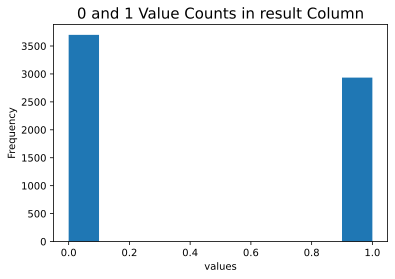

In [36]:
print(f'Before upsampling/downsampling:\n{train.result.value_counts()}')

train.result.hist()
plt.grid(False)
plt.title('0 and 1 Value Counts in result Column', fontsize=15)
plt.xlabel('values')
plt.ylabel('Frequency')
plt.show()

## Upsampling

### Random Upsampling (best f2 score) 

In [37]:
#experiment 1
train_rand = random_upsample(train, 'result')
print(f'After random upsampling:\n{train_rand.result.value_counts()}')

After random upsampling:
0    3699
1    3699
Name: result, dtype: int64


In [38]:
print('\t\t----------Training----------')
fit(train_rand,'result', models, ['RandomForest'])
metr(train_rand,'result', models, ['RandomForest'])
print('\t\t----------Validation----------')
metr(valid,'result', models, ['RandomForest'])

		----------Training----------
+--------------+----------+-----------+--------+-------+
|              | Accuracy | Precision | Recall |  F2   |
+--------------+----------+-----------+--------+-------+
| RandomForest |  99.12   |   99.08   | 99.16  | 99.15 |
+--------------+----------+-----------+--------+-------+
		----------Validation----------
+--------------+----------+-----------+--------+------+
|              | Accuracy | Precision | Recall |  F2  |
+--------------+----------+-----------+--------+------+
| RandomForest |  96.61   |   97.11   | 94.98  | 95.4 |
+--------------+----------+-----------+--------+------+


### SMOTE Upsampling

In [39]:
#experiment 2
train_smote = SMOTE_upsample(train, 'result')
print(f'After SMOTE upsampling:\n{train_smote.result.value_counts()}')

After SMOTE upsampling:
0    3699
1    3699
Name: result, dtype: int64


In [40]:
print('\t\t----------Training----------')
fit(train_smote,'result', models, ['RandomForest'])
metr(train_smote,'result', models, ['RandomForest'])
print('\t\t----------Validation----------')
metr(valid,'result', models, ['RandomForest'])

		----------Training----------
+--------------+----------+-----------+--------+-------+
|              | Accuracy | Precision | Recall |  F2   |
+--------------+----------+-----------+--------+-------+
| RandomForest |  99.16   |   99.22   | 99.11  | 99.13 |
+--------------+----------+-----------+--------+-------+
		----------Validation----------
+--------------+----------+-----------+--------+------+
|              | Accuracy | Precision | Recall |  F2  |
+--------------+----------+-----------+--------+------+
| RandomForest |  96.47   |   96.7    | 95.08  | 95.4 |
+--------------+----------+-----------+--------+------+


## Downsampling

### TomekLinks Downsampling

In [41]:
#experiment 3
train_tom = TomekLinks_downsample(train, 'result')
print(f'After TomekLinks downsampling:\n{train_tom.result.value_counts()}')

After TomekLinks downsampling:
0    3684
1    2934
Name: result, dtype: int64


In [42]:
print('\t\t----------Training----------')
fit(train_tom,'result', models, ['RandomForest'])
metr(train_tom,'result', models, ['RandomForest'])
print('\t\t----------Validation----------')
metr(valid,'result', models, ['RandomForest'])

		----------Training----------
+--------------+----------+-----------+--------+-------+
|              | Accuracy | Precision | Recall |  F2   |
+--------------+----------+-----------+--------+-------+
| RandomForest |  99.14   |   98.95   | 99.11  | 99.08 |
+--------------+----------+-----------+--------+-------+
		----------Validation----------
+--------------+----------+-----------+--------+-------+
|              | Accuracy | Precision | Recall |  F2   |
+--------------+----------+-----------+--------+-------+
| RandomForest |  96.43   |   96.6    | 95.08  | 95.38 |
+--------------+----------+-----------+--------+-------+


### KNN Downsampling (best f2 score)

In [43]:
#experiment 4
train_knn = KNN_downsample(train, 'result')
print(f'After Knn downsampling:\n{train_knn.result.value_counts()}')

After Knn downsampling:
1    2934
0    2252
Name: result, dtype: int64


In [44]:
print('\t\t----------Training----------')
fit(train_knn,'result', models, ['RandomForest'])
metr(train_knn,'result', models, ['RandomForest'])
print('\t\t----------Validation----------')
metr(valid,'result', models, ['RandomForest'])

		----------Training----------
+--------------+----------+-----------+--------+-------+
|              | Accuracy | Precision | Recall |  F2   |
+--------------+----------+-----------+--------+-------+
| RandomForest |  99.96   |   100.0   | 99.93  | 99.95 |
+--------------+----------+-----------+--------+-------+
		----------Validation----------
+--------------+----------+-----------+--------+-------+
|              | Accuracy | Precision | Recall |  F2   |
+--------------+----------+-----------+--------+-------+
| RandomForest |  91.59   |   84.44   | 98.74  | 95.51 |
+--------------+----------+-----------+--------+-------+


### Random Forest Hyperparameter Tuning Using Random Search 

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 10,50,100]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,20, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10,50,100,150]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 10, 50, 100], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 20, 50], 'min_samples_leaf': [1, 2, 4, 10, 50, 100, 150], 'bootstrap': [True]}


In [46]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(n_jobs = -1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
f2 = make_scorer(fbeta_score, beta=2)
rf_random = RandomizedSearchCV(estimator = rf, scoring=f2, param_distributions = random_grid
                               , n_iter = 100, cv = 16, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_knn.drop('result', axis=1), train_knn['result'])

Fitting 16 folds for each of 100 candidates, totalling 1600 fits


RandomizedSearchCV(cv=16, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 10, 50, 100],
                                        'min_samples_leaf': [1, 2, 4, 10, 50,
                                                             100, 150],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [10, 42, 74, 106, 138,
                                                         171, 203, 235, 267,
                                                         300]},
                   random_state=42, scoring=make_scorer(fbeta_score, beta=2),
   

In [47]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'n_estimators': 171, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 70, 'bootstrap': True}
0.9903554949156133


In [48]:
#update dictionary
models['RandomForest'] = RandomForestClassifier(n_estimators = 171, min_samples_split= 2, min_samples_leaf= 1,
 max_features = 10, max_depth= 70, bootstrap= True)

In [49]:
#experiment 4
print('\t\t----------Training----------')
fit(train_knn,'result', models, ['RandomForest'])
metr(train_knn,'result', models, ['RandomForest'])
print('\t\t----------Validation----------')
metr(valid,'result', models, ['RandomForest'])

		----------Training----------
+--------------+----------+-----------+--------+-------+
|              | Accuracy | Precision | Recall |  F2   |
+--------------+----------+-----------+--------+-------+
| RandomForest |  99.96   |   100.0   | 99.93  | 99.95 |
+--------------+----------+-----------+--------+-------+
		----------Validation----------
+--------------+----------+-----------+--------+-------+
|              | Accuracy | Precision | Recall |  F2   |
+--------------+----------+-----------+--------+-------+
| RandomForest |  92.13   |   85.42   | 98.64  | 95.68 |
+--------------+----------+-----------+--------+-------+


## PartIV: Graps and Plots

### Precision and Recall plots

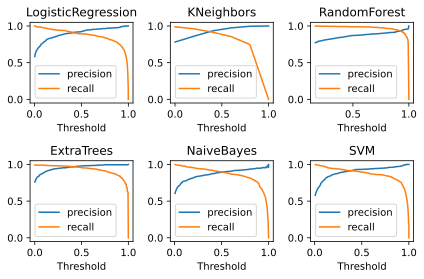

In [50]:
# use the probabilities to make a curve showing us how recall and thresholds trade off 
a = 1
for model_name in list(models):
    curr_model = models[model_name]
    precision_curve, recall_curve, threshold_curve = precision_recall_curve(test['result']
                                                                            , curr_model.predict_proba(test.drop('result', axis=1))[:,1] )

    plt.subplot(2, 3, a)
    plt.plot(threshold_curve, precision_curve[1:],label='precision')
    plt.plot(threshold_curve, recall_curve[1:], label='recall')
    plt.title(model_name)
    plt.legend(loc='lower left')
    plt.xlabel('Threshold')
    a = a+1
plt.tight_layout()
plt.show()

### Confusion Matrices

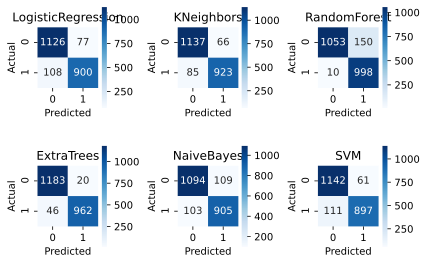

In [51]:
#  plot Numerical Data
#plt.subplot(2, 3, 1)
a = 1
for model_name in list(models):
    curr_model = models[model_name]
    knn_confusion = metrics.confusion_matrix(test['result'], models[model_name].predict(test.drop('result', axis=1)))
    plt.subplot(2, 3, a)
    sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,fmt='g')
    plt.title(model_name.split('_')[0]);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    a = a+1
plt.tight_layout()
plt.show()

### Roc Curve Plot

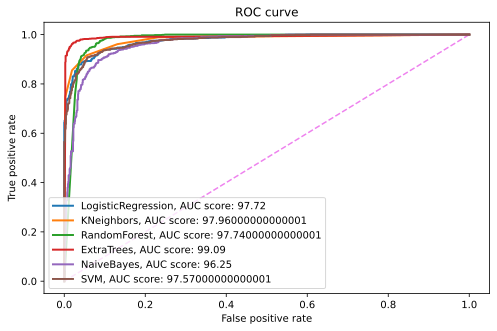

In [52]:
plt.figure(dpi=100, figsize=(8, 5))
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
for model_name in list(models):
    curr_model = models[model_name]
    fpr, tpr, thresholds = roc_curve(test['result'], curr_model.predict_proba(test.drop('result', axis=1))[:,1])
    auc = 100*round(roc_auc_score(test['result'], curr_model.predict_proba(test.drop('result', axis=1))[:,1]),4)
    plt.plot(fpr, tpr,lw=2,label=f'{model_name}, AUC score: {auc}')
    plt.legend(loc='lower left')
plt.show()

## PartV: Pickling

### Train Models and Save to Pickled Files

In [53]:
for model_name in list(models):
    curr_model = models[model_name]
    curr_model.fit(train.drop('result', axis=1), train['result'])
    with open(f"models/{model_name}.pickle", "wb") as pfile:
        pickle.dump(curr_model, pfile)

### Read Models from Pickled Files

In [54]:
for model_name in list(models):
    with open(f"models/{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")

### Show models Score

In [55]:
print('\t\t----------Training----------')
metr(train,'result', models)
print('\t\t----------Validation----------')
metr(valid,'result', models)

		----------Training----------
+--------------------+----------+-----------+--------+-------+
|                    | Accuracy | Precision | Recall |  F2   |
+--------------------+----------+-----------+--------+-------+
| LogisticRegression |  93.22   |   93.37   | 91.14  | 91.58 |
+--------------------+----------+-----------+--------+-------+
|     KNeighbors     |  96.08   |   95.76   | 95.36  | 95.44 |
+--------------------+----------+-----------+--------+-------+
|    RandomForest    |  99.14   |   99.15   | 98.91  | 98.96 |
+--------------------+----------+-----------+--------+-------+
|     ExtraTrees     |  99.14   |   99.28   | 98.77  | 98.87 |
+--------------------+----------+-----------+--------+-------+
|     NaiveBayes     |   90.8   |   89.5    | 89.74  | 89.69 |
+--------------------+----------+-----------+--------+-------+
|        SVM         |  92.96   |   93.33   | 90.56  | 91.1  |
+--------------------+----------+-----------+--------+-------+
		----------Validation--

### Columns Detailed Description

1- **UsingIP:** If an IP address is used as an alternative of the domain name in the URL, such as “http://125.98.3.123/fake.html”, users can be sure that someone is trying to steal their personal information. Sometimes, the IP address is even transformed into hexadecimal code as shown in the following link “http://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html”.

2- **LongURL:**
Phishers can use long URL to hide the doubtful part in the address bar. For example: http://federmacedoadv.com.br/3f/aze/ab51e2e319e51502f416dbe46b773a5e/?cmd=_home&dispatch=11004d58f5b74f8dc1e7c2e8dd4105e811004d58f5b74f8dc1e7c2e8dd4105e8@phishing.website.html To ensure accuracy of our study, we calculated the length of URLs in the dataset and produced an average URL length. The results showed that if the length of the URL is greater than or equal 54 characters then the URL classified as phishing. By reviewing our dataset we were able to find 1220 URLs lengths equals to 54 or more which constitute&nbsp;48.8% of the total dataset size

3- **ShortURL:**
URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL. For example, the URL “http://portal.hud.ac.uk/” can be shortened to “bit.ly/19DXSk4”.

4- **Symbol@:**
Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol. Rule: IF

5-- **Redirecting//:**
The existence of “//” within the URL path means that the user will be redirected to another website. An example of such URL’s is: “http://www.legitimate.com//http://www.phishing.com”. We examin the location where the “//” appears. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position. Rule: IF
    
6- **PrefixSuffix-:**
The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage. For example http://www.Confirme-paypal.com/. Rule: IF

7- **SubDomains:**
Let us assume we have the following link: http://www.hud.ac.uk/students/. A domain name might include the country-code top-level domains (ccTLD), which in our example is “uk”. The “ac” part is shorthand for “academic”, the combined “ac.uk” is called a second-level domain (SLD) and “hud” is the actual name of the domain. To produce a rule for extracting this feature, we firstly have to omit the (www.) from the URL which is in fact a sub domain in itself. Then, we have to remove the (ccTLD

8- **HTTPS:**
The existence of HTTPS is very important in giving the impression of website legitimacy, but this is clearly not enough. The authors in (Mohammad, Thabtah and McCluskey 2012) (Mohammad, Thabtah and McCluskey 2013) suggest checking the certificate assigned with HTTPS including the extent of the trust certificate issuer, and the certificate age. Certificate Authorities that are consistently listed among the top trustworthy names include: “GeoTrust, GoDaddy, Network Solutions, Thawte, Comodo, Doster and VeriSign”. Furthermore, by testing out our datasets, we find that the minimum age of a reputable certificate is two years. Rule: IF

9- **DomainRegLen:**
Based on the fact that a phishing website lives for a short period of time, we believe that trustworthy domains are regularly paid for several years in advance. In our dataset, we find that the longest fraudulent domains have been used for one year only.

10- **Favicon:**
A favicon is a graphic image (icon) associated with a specific webpage. Many existing user agents such as graphical browsers and newsreaders show favicon as a visual reminder of the website identity in the address bar. If the favicon is loaded from a domain other than that shown in the address bar, then the webpage is likely to be considered a Phishing attempt.

11- **NonStdPort:**
This feature is useful in validating if a particular service (e.g. HTTP) is up or down on a specific server. In the aim of controlling intrusions, it is much better to merely open ports that you need. Several firewalls, Proxy and Network Address Translation (NAT) servers will, by default, block all or most of the ports and only open the ones selected.&nbsp;If all ports are open, phishers can run almost any service they want and as a result, user information is threatened.

12- **HTTPSDomainURL:**
The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users. For example, http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/.

13- **RequestURL:**
Request URL examines whether the external objects contained within a webpage such as images, videos and sounds are loaded from another domain. In legitimate webpages, the webpage address and most of objects embedded within the webpage are sharing the same domain

14- **AnchorURL:**
An anchor is an element defined by the < a > tag. This feature is treated exactly as “Request URL”. However, for this feature we examine: 1.If the < /a >< a > tags and the website have different domain names. This is similar to request URL feature. 2.If the anchor does not link to any webpage, e.g.: A.< /a >< a href="“#”"> B.< /a >< a href="“#content”"> C.< /a >< a href="“#skip”"> D.< /a >< a href="“JavaScript">
    
15- **LinksInScriptTags:**
Given that our investigation covers all angles likely to be used in the webpage source code, we find that it is common for legitimate websites to use tags to offer metadata about the HTML document;
    
16- **ServerFormHandler:**
SFHs that contain an empty string or “about:blank” are considered doubtful because an action should be taken upon the submitted information. In addition, if the domain name in SFHs is different from the domain name of the webpage, this reveals that the webpage is suspicious because the submitted information is rarely handled by external domains.
    
17- **InfoEmail:**
Web form allows a user to submit his personal information that is directed to a server for processing. A phisher might redirect the user’s information to his personal email. To that end, a server-side script language might be used such as “mail()” function in PHP. One more client-side function that might be used for this purpose is the “mailto:” function.
    
18- **AbnormalURL:**
This feature can be extracted from WHOIS database. For a legitimate website, identity is typically part of its URL.
    
19- **WebsiteForwarding:**
The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times.
    
20- **StatusBarCust:**
Phishers may use JavaScript to show a fake URL in the status bar to users. To extract this feature, we must dig-out the webpage source code, particularly the “onMouseOver” event, and check if it makes any changes on the status bar.
    
21- **DisableRightClick:**
Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. This feature is treated exactly as “Using onMouseOver to hide the Link”. Nonetheless, for this feature, we will search for event “event.button==2” in the webpage source code and check if the right click is disabled. 
    
    
22- **popUpWidnow:**
It is unusual to find a legitimate website asking users to submit their personal information through a pop-up window. On the other hand, this feature has been used in some legitimate websites and its main goal is to warn users about fraudulent activities or broadcast a welcome announcement, though no personal information was asked to be filled in through these pop-up windows.
    
23- **IframeRedirection:**
IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation.
    
24- **AgeofDomain:**
This feature can be extracted from WHOIS database (Whois 2005). Most phishing websites live for a short period of time. By reviewing our dataset, we find that the minimum age of the legitimate domain is 6 months. 

25- **DNSRecording:**
For phishing websites, either the claimed identity is not recognized by the WHOIS database (Whois 2005) or no records founded for the hostname (Pan and Ding 2006). If the DNS record is empty or not found then the website is classified as “Phishing”, otherwise it is classified as “Legitimate”. 
    
26- **WebsiteTraffic:**
This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. However, since phishing websites live for a short period of time, they may not be recognized by the Alexa database (Alexa the Web Information Company., 1996). By reviewing our dataset, we find that in worst scenarios, legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic or is not recognized by the Alexa database, it is classified as “Phishing”. Otherwise, it is classified as “Suspicious”. 
    
27- **PageRank:**
PageRank is a value ranging from “0” to “1”. PageRank aims to measure how important a webpage is on the Internet. The greater the PageRank value the more important the webpage. In our datasets, we find that about 95% of phishing webpages have no PageRank. Moreover, we find that the remaining 5% of phishing webpages may reach a PageRank value up to “0.2”.
    
28- **GoogleIndex:**
This feature examines whether a website is in Google’s index or not. When a site is indexed by Google, it is displayed on search results (Webmaster resources, 2014). Usually, phishing webpages are merely accessible for a short period and as a result, many phishing webpages may not be found on the Google index.
    
29- **LinksPointingToPage:**
The number of links pointing to the webpage indicates its legitimacy level, even if some links are of the same domain (Dean, 2014). In our datasets and due to its short life span, we find that 98% of phishing dataset items have no links pointing to them. On the other hand, legitimate websites have at least 2 external links pointing to them.
    
30- **StatsReport:**
Several parties such as PhishTank (PhishTank Stats, 2010-2012), and StopBadware (StopBadware, 2010-2012) formulate numerous statistical reports on phishing websites at every given period of time; some are monthly and others are quarterly. In our research, we used 2 forms of the top ten statistics from PhishTank: “Top 10 Domains” and “Top 10 IPs” according to statistical-reports published in the last three years, starting in January2010 to November 2012. Whereas for “StopBadware”, we used “Top 50” IP addresses.

31- **result:**
0 means legitimate 1 is phishing

**Data obtained from: https://www.kaggle.com/dnyaneshsatpute/phishing-webiste-detection/data**
